# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [183]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

In [184]:
crops.shape

(2200, 5)

In [185]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [186]:
# Different crops count
crops["crop"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

# Data preprocessing

## Missing values

In [187]:
# Missing values
crops.isna().sum().sort_values(ascending=False)

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

## Data types

In [188]:
# Data types
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


## Features distribution

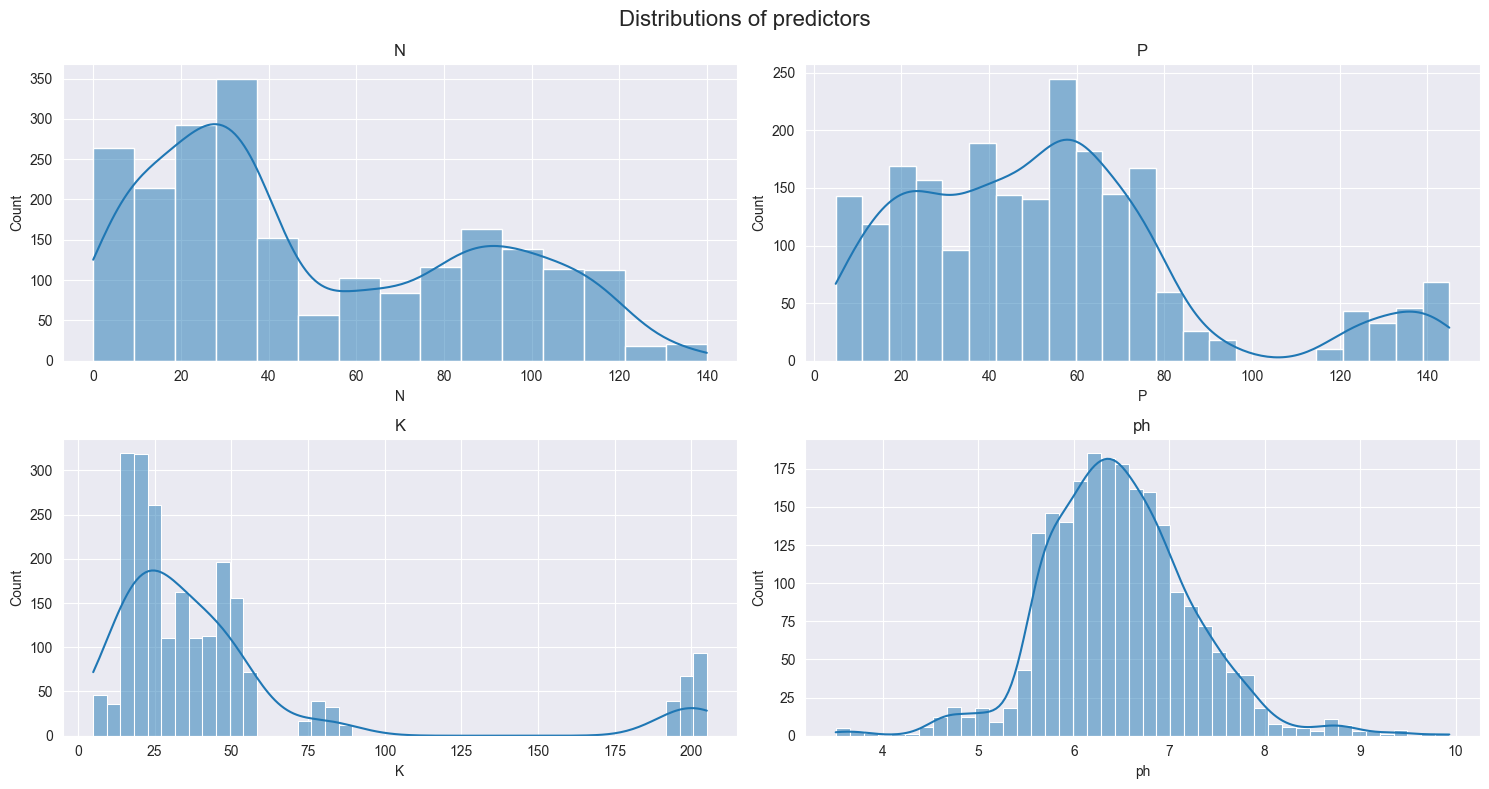

In [189]:
# Determine number of columns for the grid based on the number of numeric columns
num_cols = len(crops.select_dtypes(include=['float64', 'int64']).columns)
desired_cols = 2
num_rows = (num_cols // desired_cols) + (num_cols % desired_cols > 0)  # Adjust for the desired number of columns

# Create a figure with subplots in a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=desired_cols, figsize=(15, 4*num_rows))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

sns.set_style("darkgrid")

# Iterate through each numeric column in the dataframe
for i, column in enumerate(crops.select_dtypes(include=['float64', 'int64']).columns):
    sns.histplot(crops[column].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Hide any empty subplots
for j in range(num_cols, len(axes)):
    axes[j].axis('off')

plt.suptitle("Distributions of predictors", fontsize=16)
plt.tight_layout()
plt.show()

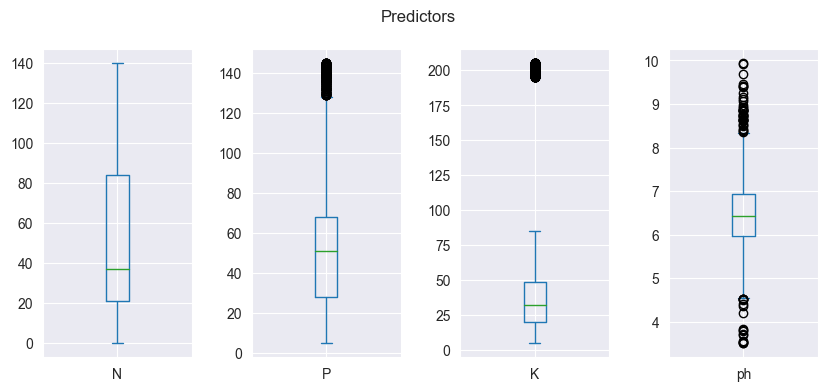

In [190]:
crops.plot(
    kind="box",
    subplots=True,
    sharey=False,
    figsize=(10, 4),
)

plt.subplots_adjust(wspace=0.4)
plt.suptitle("Predictors")
plt.show()

In [191]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


## Split data

In [192]:
features = crops.drop(columns=["crop"]).columns
features

Index(['N', 'P', 'K', 'ph'], dtype='object')

In [193]:
test_size = 0.20 # 20%

X_train, X_test, y_train, y_test = train_test_split(
    crops[features],
    crops["crop"],
    test_size=test_size,
    stratify=crops["crop"], 
    random_state=42
)

In [194]:
print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (1760, 4)
X test shape: (440, 4)
y train shape: (1760,)
y test shape: (440,)


# Predict `crop` using each feature

In [195]:
from tabulate import tabulate

max_iter = 2000
multi_class = "multinomial"

# Data table
data_table = []
# Create header
head = ["Feature", "F1-Score"]

for feature in features:   
    model = LogisticRegression(
        max_iter=max_iter, 
        multi_class=multi_class,
    )
    model.fit(X_train[[feature]], y_train)
    
    # Predict values with our fitted model
    y_pred = model.predict(X_test[[feature]])
    model_f1_score = f1_score(y_test, y_pred, average="weighted")
    data_table.append([feature, round(model_f1_score, 4)])

# Display table
print(tabulate(data_table, headers=head, tablefmt="grid", numalign="left", stralign="center"))

+-----------+------------+
|  Feature  | F1-Score   |
+===========+============+
|     N     | 0.1222     |
+-----------+------------+
|     P     | 0.1682     |
+-----------+------------+
|     K     | 0.2691     |
+-----------+------------+
|    ph     | 0.0748     |
+-----------+------------+


# Obtain correlation matrix to avoid multicolinearity

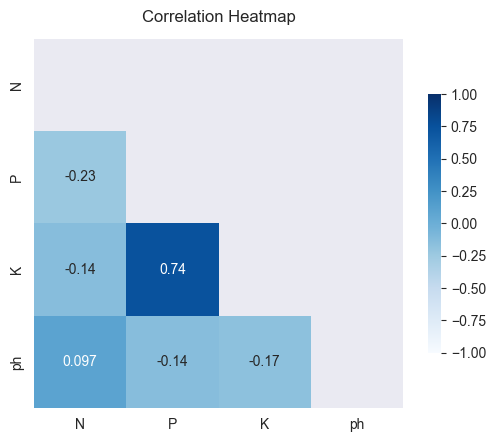

In [196]:
import numpy as np

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(crops.corr(), dtype=bool))
# Generate a custom diverging colormap
cmap = sns.color_palette("Blues", as_cmap=True)

heatmap = sns.heatmap(crops.corr(), cmap=cmap, mask=mask, vmin=-1, vmax=1,                              annot=True,cbar_kws={"shrink": .7}, square=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Given the high correlation between P and K, it is necessary to discard one of them. In this scenario, we opt to retain K as it exhibits a higher F1-Score.

## Drop highly correlated features

In [197]:
final_features = ["N", "K", "ph"]

X_train, X_test, y_train, y_test = train_test_split(
    crops[final_features],
    crops["crop"],
    test_size=0.2,
    random_state=42,
)

# Logistic Regression Model with selected features

In [198]:
# Create model
log_reg = LogisticRegression(
    max_iter=2000, 
    multi_class="multinomial",
)

# Train model
log_reg.fit(X_train, y_train)

# Evaluate model performance with F1-Score metric
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average="weighted")

print(f"Model F1-Score: {model_f1_score:.5f}")

Model F1-Score: 0.07482


## Visualizing Confusion Matrix

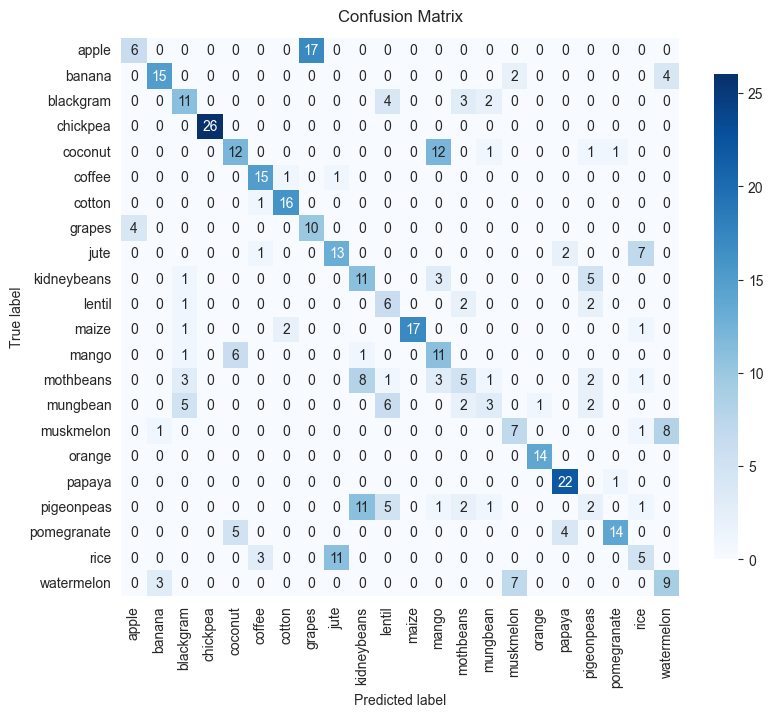

In [200]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

names_sorted = sorted(crops["crop"].unique().tolist())

plt.figure(figsize=(9,9))
cmap = sns.color_palette("Blues", as_cmap=True)
cm_plot = sns.heatmap(cm, cmap=cmap, annot=True, xticklabels=names_sorted,
                      yticklabels=names_sorted, cbar_kws={"shrink": .7}, square=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
cm_plot.set_title('Confusion Matrix', fontdict={'fontsize':12}, pad=12)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Conclusion

Overall, we have obtained a model that is capable of classifying quite well, as evidenced by the predominance of the diagonal in the correlation matrix. However, certain classes, such as grapes, are frequently misclassified as apples, or rice is confused with maize, among others. It would be ideal to investigate the contextual factors that may be influencing these classes or conduct multiple hyperparameter tuning experiments to enhance the performance of our classifier.